<a href="https://colab.research.google.com/github/glorivaas/Risk_Measures/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Elliptical distributions intro
## Author: Gloria Rivas

### Exercise 1
Construct a QQ plot of the SPX500 index data obtained in the previous notebook

Use a statistical test to check for normality of the returns (e.g., Jarque-Bera test).

[*********************100%***********************]  1 of 1 completed


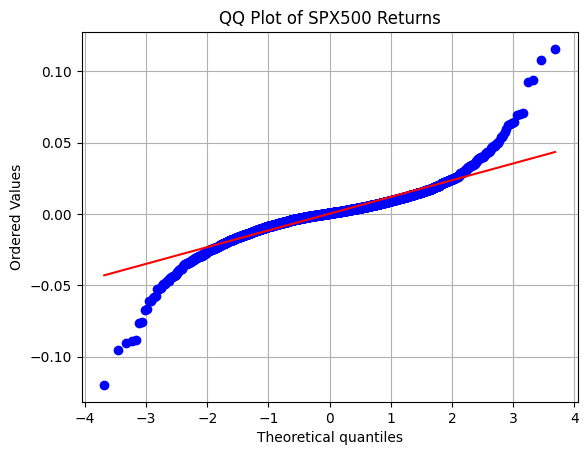

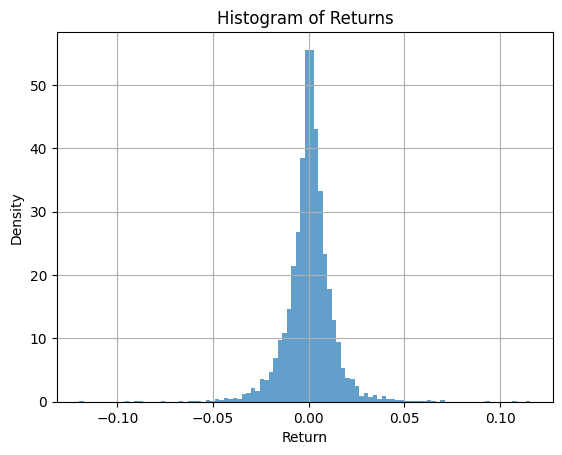

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

ticker = "^GSPC"
data = yf.download(ticker, start="2000-01-01", end="2024-01-01")["Close"]
returns = data.pct_change().dropna()
returns = returns.squeeze()

stats.probplot(returns, dist="norm", plot=plt)
plt.title("QQ Plot of SPX500 Returns")
plt.grid(True)
plt.show()

plt.hist(returns.values.flatten(), bins=100, density=True, alpha=0.7)
plt.title("Histogram of Returns")
plt.xlabel("Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()

We can observe some heavy tails (which means we have some extreme values) and a "S" shape that suggest that the returns are not notmally distributed, but let's check it as requested.
Additionally, I represented the histogram of the data to check that, indeed, it does not look normally distributed (very high spike and fat tails).

In [20]:
from scipy.stats import jarque_bera

jb_stat, jb_pvalue = jarque_bera(returns)
print(f"Jarque-Bera Test Statistic: {jb_stat:.2f}")
print(f"P-value: {jb_pvalue:.5f}")

Jarque-Bera Test Statistic: 25503.43
P-value: 0.00000


And this test confirms our theory: a P-value of aprox 0 means that we reject the null hypothesis that the SPX500 returns are normally distributed. Futhermore, 25503.43 is a very large value, indicating extreme deviation from normality.

### Exercise 2
Let $\hat{\mu}, \hat{\Sigma}$ be the standard mean and covariance estimators of the returns of the family of stocks, obtained in the previous notebook.

Define
$$
D_i^2 = (X_i-\hat{\mu})^T\hat{\Sigma}^{-1}(X_i-\hat{\mu})
$$
where $i=1,\ldots, n_{obs}$ and $X_i$ is the vector of observed returns at day $i$.

Under the normality assumption of the returns, it can be shown that $D_i^2$ is approximately $\chi_d^2$ distributed.
Construct a QQ plot of the observed $D_i$ against this distribution.


[*********************100%***********************]  10 of 10 completed


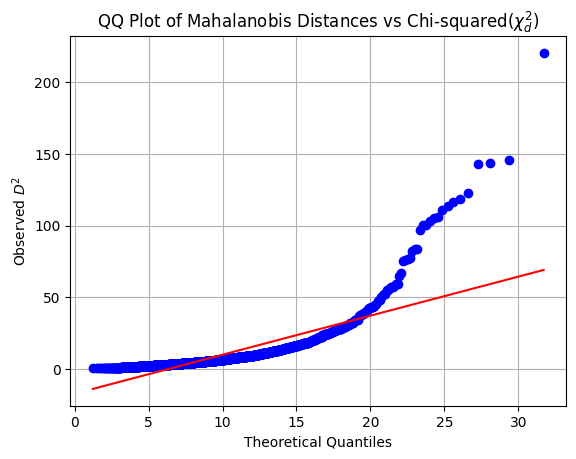

In [17]:
from scipy.spatial.distance import mahalanobis
import scipy.stats as stats
import matplotlib.pyplot as plt

tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "JPM", "V"]
data = yf.download(tickers, start="2018-01-01", end="2024-02-28")["Close"]
returns = data.pct_change().dropna()

X = returns.values
mu_hat = np.mean(X, axis=0)
Sigma_hat = np.cov(X, rowvar=False)

inv_Sigma = np.linalg.inv(Sigma_hat)
D_squared = np.array([
    (x - mu_hat) @ inv_Sigma @ (x - mu_hat).T for x in X
])

d = X.shape[1]

stats.probplot(D_squared, dist="chi2", sparams=(d,), plot=plt)
plt.title("QQ Plot of Mahalanobis Distances vs Chi-squared($\chi^2_d$)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Observed $D^2$")
plt.grid()
plt.show()




The QQ plot shows significant deviation from the reference line, particularly in the right tail. This indicates that the multivariate returns do not follow a multivariate normal distribution, as the extreme values are more frequent than expected. This result is consistent with the results from exercise 1, where the Jarque-Bera test rejected the null hypothesis of normality for the marginal distributions of returns.

### Exercise 3

We want to test if $X\sim E_d(\mu,\Sigma, \psi)$ for some parameters, using the observations of a sample of SP500 stocks.
1. Argue that one can use the estimates $\hat{\mu}$, $\hat{\Sigma}$ from the previous exercise for estimating $\mu$, $\Sigma$.
2. Using the estimate $\hat{\mu}$, $\hat{\Sigma}$, calculate $Y_i = \hat{\Sigma}^{-1/2}(X-\hat{\mu})$.
3. Calculate beta statistics of $Y$, $T(Y) = \frac{\sum_{i=1}^k Y_i^2}{\sum_{i=1}^d Y_i^2}$ for various $k$.
4. Generate a QQ plot of these statistics against the corresponding beta distributions.